<a href="https://colab.research.google.com/github/virguleria/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Project Name** - Yes Bank Stock Closing Price Prediction
####**Project Type** - Regression
####**Contribution** - Individual


Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

##Import Libraries

In [ ]:

# Import Libraries
import numpy as np                                                           #numerical computations
import pandas as pd                                                          #to load the data


import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns                                                        # for visualization


from sklearn.preprocessing import (MinMaxScaler,StandardScaler)              #scaling the data
from sklearn.model_selection import train_test_split                        # split train and test data

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import (Lasso, Ridge,ElasticNet, LassoCV, RidgeCV, ElasticNetCV)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# mount drive to load dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Yes Bank/data_YesBank_StockPrices.csv')

In [ ]:

# sample of dataset
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [ ]:
df.shape

(185, 5)

In [ ]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


###Duplicate Values

In [ ]:

# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

###Missing Values/Null Values

In [ ]:

# Missing Values/Null Values Count
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:
df.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

##Understanding Your Variables

In [ ]:

# Dataset Columns
df.columns


Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:

# Dataset Describe
df.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


In [ ]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


###Check Unique Values for each variable.

In [ ]:

# Check Unique Values for each variable.
for i in df.columns.tolist():
  print('unique values in ',i, 'are', df[i].nunique())

unique values in  Date are 185
unique values in  Open are 183
unique values in  High are 184
unique values in  Low are 183
unique values in  Close are 185


##Data Wrangling

In [ ]:
# Write your code to make your dataset analysis ready.
#copy of my dataset
df_copy= df.copy()

In [ ]:
df_copy.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
df_copy.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:

len(df_copy[df_copy.duplicated()])

0

In [ ]:

df_copy.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:

df_copy.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:

col=df_copy.columns.to_list()
numerical_cols=col[1:]

In [ ]:

#setting the Date as index.
df_copy.set_index('Date', inplace=True)


In [ ]:

df_copy.head()

,Open,High,Low,Close
Date,,,,
Jul-05,13.00,14.00,11.25,12.46
Aug-05,12.58,14.88,12.55,13.42
Sep-05,13.48,14.87,12.27,13.30
Oct-05,13.20,14.47,12.40,12.99
Nov-05,13.35,13.88,12.88,13.41


In [ ]:

# seperating the data
independent_variables = df_copy.columns.tolist()[:-1]
dependent_variable = ['Close']

print(independent_variables)
print(dependent_variable)

['Open', 'High', 'Low']
['Close']


##Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables*

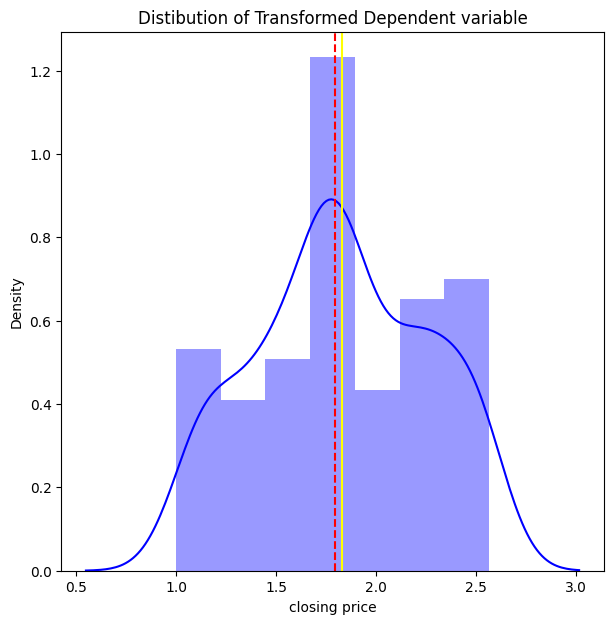

In [ ]:
#applying log transformation
plt.figure(figsize=(7,7))
sns.distplot(np.log10(df_copy['Close']),color="b")
plt.title('Distibution of Transformed Dependent variable')
plt.xlabel('closing price')


plt.axvline(np.log10(df_copy['Close']).mean(),color='yellow')
plt.axvline(np.log10(df_copy['Close']).median(),color='red',linestyle='dashed')
plt.show()

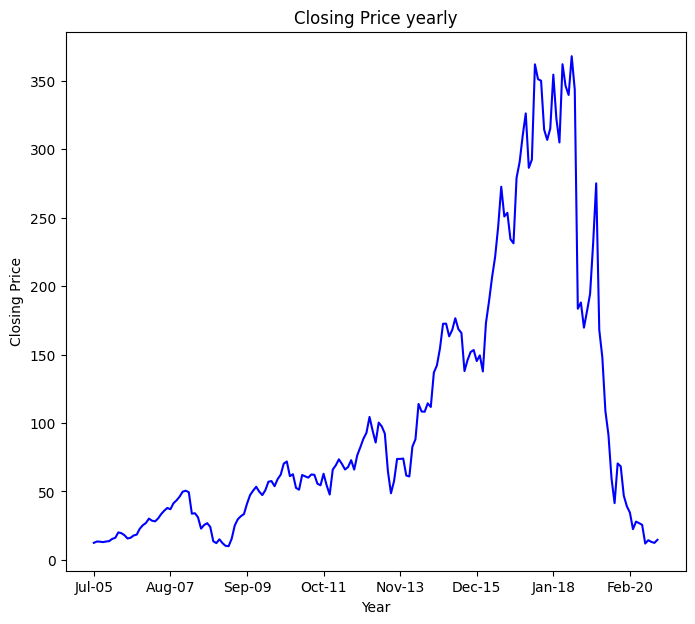

In [ ]:
plt.figure(figsize=(8,7))
df_copy['Close'].plot(color = 'b')

plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Closing Price yearly')
plt.show()


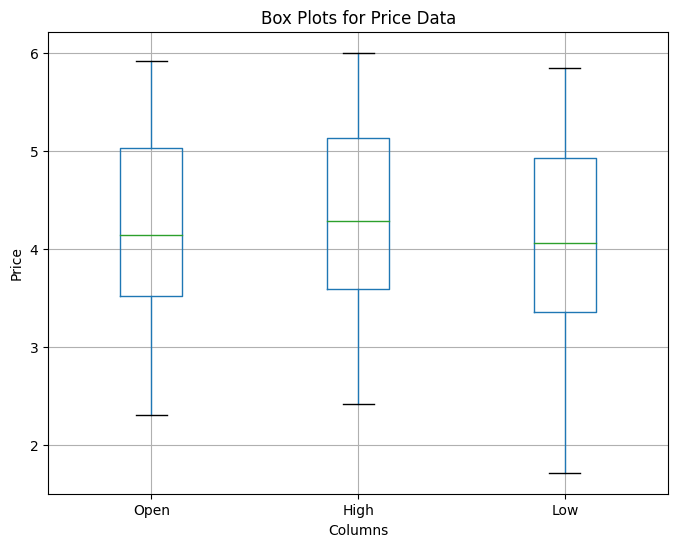

In [ ]:

df_price = np.log(df_copy[['Open', 'High', 'Low']])

plt.figure(figsize=(8, 6))
df_price.boxplot()
plt.xlabel('Columns')
plt.ylabel('Price')
plt.title('Box Plots for Price Data')
plt.show()

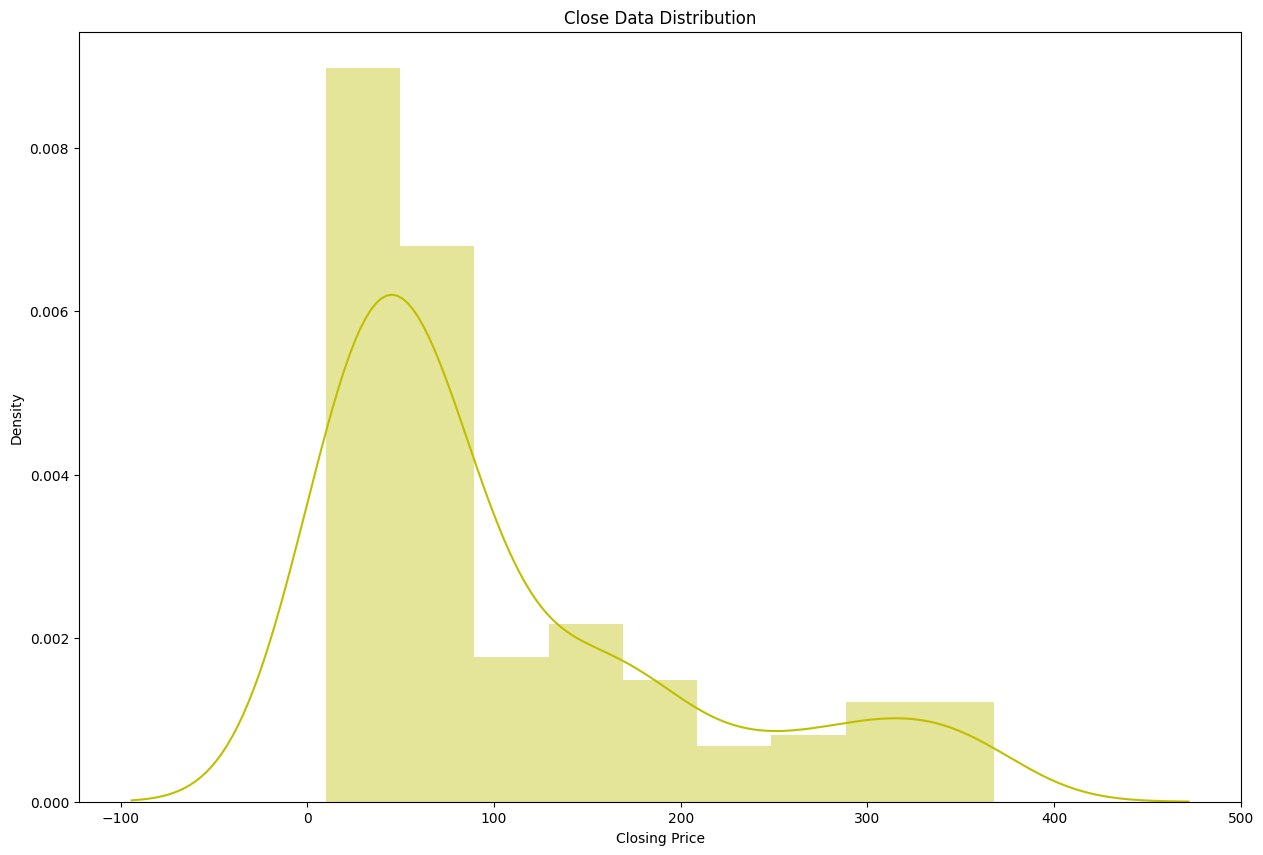

In [ ]:

# Dependent variable 'Closing price'
plt.figure(figsize=(15,10))
sns.distplot(df['Close'],color="y")
plt.title('Close Data Distribution')
plt.xlabel('Closing Price')
plt.show()

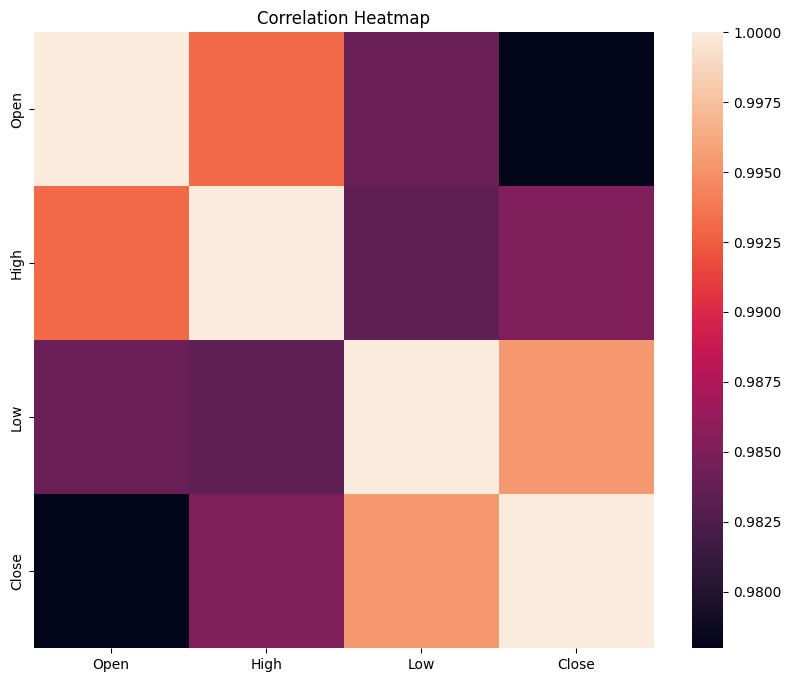

In [ ]:

# correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr())
plt.title('Correlation Heatmap')
plt.show()

In [ ]:

df1=df_copy.copy()

#Feature Engineering & Data Pre-processing

In [ ]:
#There are no missing values in the dataset.

df_copy.isnull().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:

# Manipulate Features to minimize feature correlation and create new features

# As all the independent variables are highly correlated, I can create a new feature by takinig mean from the each record of independent variables. This will avoid MultiCollinearity and also overfitting of the model.


df_copy['Mean_OHL'] = df_copy[['Open', 'High', 'Low']].mean(axis=1)
df_copy.head()

,Open,High,Low,Close,Mean_OHL
Date,,,,,
Jul-05,13.00,14.00,11.25,12.46,12.750000
Aug-05,12.58,14.88,12.55,13.42,13.336667
Sep-05,13.48,14.87,12.27,13.30,13.540000
Oct-05,13.20,14.47,12.40,12.99,13.356667
Nov-05,13.35,13.88,12.88,13.41,13.370000


<Axes: xlabel='Mean_OHL', ylabel='Density'>

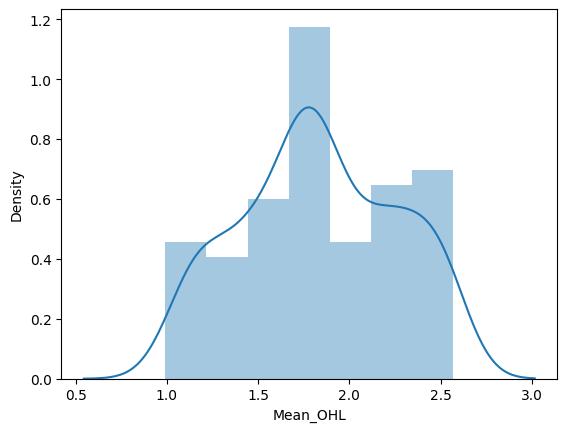

In [ ]:
x=np.log10(df_copy['Mean_OHL'])
sns.distplot(x)

In [ ]:

# use lags as additional features
for i in range(1, 13):
    df_copy["lag_{}".format(i)] = df_copy.Mean_OHL.shift(i)

In [ ]:
#independent_variables1
y_depend = df_copy.dropna().Close.values
x_independ = df_copy.dropna().drop(['Close','Open','High','Low'], axis=1)


In [ ]:

# Transform Your data

x_independ['Mean_OHL'] = np.log10(x_independ['Mean_OHL'])

# Create the dependent variable data
Y = np.log10(y_depend)

x_independ.values


array([[ 1.19516137, 16.66666667, 19.13333333, ..., 13.54      ,
        13.33666667, 12.75      ],
       [ 1.22358246, 15.67333333, 16.66666667, ..., 13.35666667,
        13.54      , 13.33666667],
       [ 1.25269125, 16.73333333, 15.67333333, ..., 13.37      ,
        13.35666667, 13.54      ],
       ...,
       [ 1.15014216, 13.67      , 21.66666667, ..., 68.76666667,
        49.23333333, 57.66666667],
       [ 1.11859537, 14.13      , 13.67      , ..., 60.4       ,
        68.76666667, 49.23333333],
       [ 1.11969568, 13.14      , 14.13      , ..., 43.98333333,
        60.4       , 68.76666667]])

In [ ]:

#without transformation
#X_not =

# Create the dependent variable data
#Y_not = np.log10(y_depend)


In [ ]:

# Scaling your data

#after train_test_split
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_independ.values)



In [ ]:
#splitting the data into a train and a test set. we do this using train test split.

x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y, test_size = 0.2, random_state = 1)
print(x_train.shape)
print(x_test.shape)

(138, 13)
(35, 13)


#ML Model Implementation

##ML Model - Linear regression model

The linear regression model assumes that the relationship between the dependent variable (Close) and the independent variables is linear, which means that the change in the dependent variable is proportional to the change in the independent variables.

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm
reg_with_transformation = LinearRegression().fit(x_train, y_train)


In [ ]:

reg_with_transformation.score(x_train,y_train)

0.9843542232370774

In [ ]:


# Predicting our test data.
y_train_pred_with_transformation= reg_with_transformation.predict(x_train)
y_test_pred_with_transformation = reg_with_transformation.predict(x_test)
#y_test_pred_without_transformation = reg_without_transformation.predict(X_test)

In [ ]:

comparision_trans = pd.DataFrame(zip(10**(y_test), 10**(y_test_pred_with_transformation)), columns = ['actual', 'pred'])
comparision_trans.head()

,actual,pred
0,88.14,87.713037
1,149.38,142.253914
2,49.42,50.536952
3,70.07,73.128303
4,62.54,61.988609


In [ ]:
train_MAE = mean_absolute_error(10**(y_train),(10**y_train_pred_with_transformation))
print(f"Mean Absolute Error : {train_MAE}")


train_MSE  = mean_squared_error(10**(y_train), 10**(y_train_pred_with_transformation))
print("MSE :" , train_MSE)

train_RMSE = np.sqrt(train_MSE)
print("RMSE :" ,train_RMSE)

train_r2 = r2_score(10**(y_train), 10**(y_train_pred_with_transformation))
print("R2 :" ,train_r2)

train_adjusted_r2=1-(1-r2_score(10**(y_train), 10**(y_train_pred_with_transformation)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2)

print('\n')


MAE = mean_absolute_error(10**(y_test),(10**y_test_pred_with_transformation))
print(f"Mean Absolute Error : {MAE}")

MSE  = mean_squared_error(10**(y_test), 10**(y_test_pred_with_transformation))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_test_pred_with_transformation))
print("R2 :" ,r2)

adjusted_r2=1-(1-r2_score(10**(y_test), 10**(y_test_pred_with_transformation)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2)


Mean Absolute Error : 7.9796697876427505
MSE : 165.74457190566207
RMSE : 12.874182378142002
R2 : 0.9842311259574534
Adjusted R2: 0.9825779375497671


Mean Absolute Error : 7.6296835736156705
MSE : 247.3983988590329
RMSE : 15.72890329485921
R2 : 0.9627196081420266
Adjusted R2: 0.939641270325186


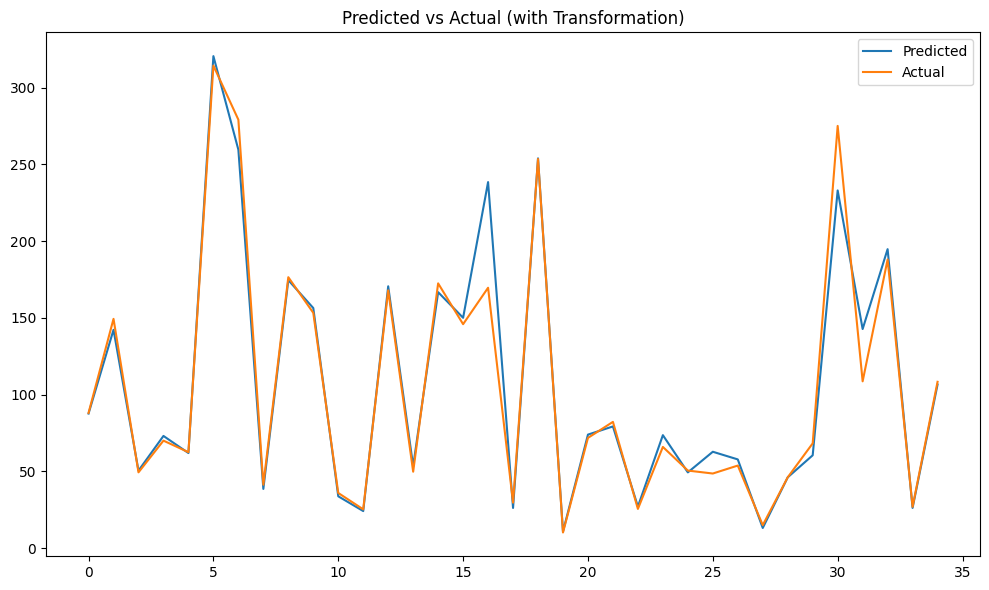

In [ ]:

#visualizing actual and predicted data


fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6))

# Plot with transformation
ax1.plot(10 ** (y_test_pred_with_transformation))
ax1.plot(np.array(10 ** (y_test)))
ax1.legend(["Predicted", "Actual"])
ax1.set_title("Predicted vs Actual (with Transformation)")


plt.tight_layout()
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

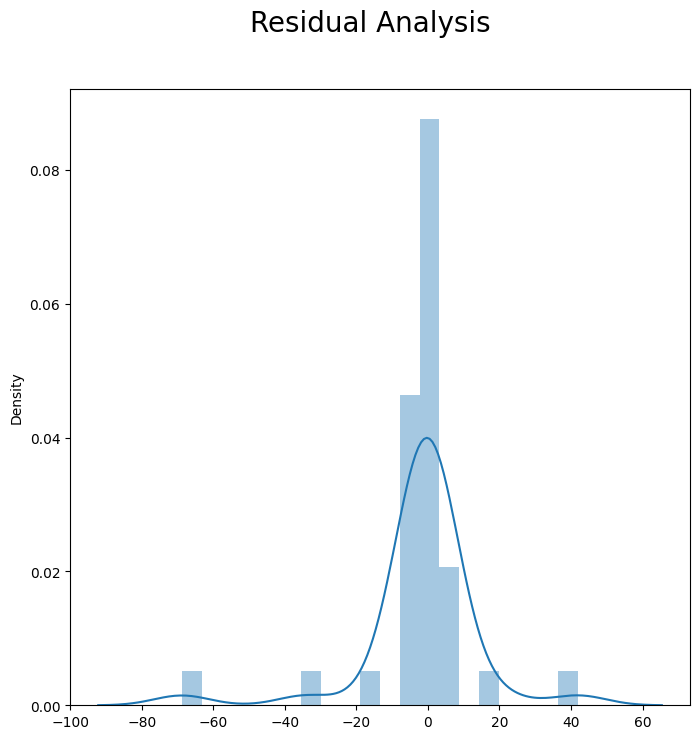

In [ ]:

fig=plt.figure(figsize=(8,8))

sns.distplot((10**(y_test)- 10**(y_test_pred_with_transformation)),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

In [ ]:
linear_regessor_list = {'Train Mean Absolute Error':train_MAE,'Train Mean squared Error' : train_MSE,'Train Root Mean squared Error' : train_RMSE,'Train R2 score' : train_r2,'Train Adjusted R2 score' : train_adjusted_r2,'Mean Absolute Error':MAE,'Mean squared Error' : MSE,'Root Mean squared Error' : RMSE,'R2 score' : r2,'Adjusted R2 score' : adjusted_r2 }
metrics = pd.DataFrame.from_dict(linear_regessor_list, orient='index').reset_index()
metrics = metrics.rename(columns={'index':'Metric',0:'reg_with_transformation'})
metrics

,Metric,reg_with_transformation
0,Train Mean Absolute Error,7.979670
1,Train Mean squared Error,165.744572
2,Train Root Mean squared Error,12.874182
3,Train R2 score,0.984231
4,Train Adjusted R2 score,0.982578
5,Mean Absolute Error,7.629684
6,Mean squared Error,247.398399
7,Root Mean squared Error,15.728903
8,R2 score,0.962720
9,Adjusted R2 score,0.939641


In [ ]:

# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameter = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],

    'positive': [True, False]
}

# Create the grid search object
Lr_gs=GridSearchCV(reg_with_transformation,param_grid=parameter,cv=5,scoring='r2')

# Fit the Algorithm
Lr_gs.fit(x_train,y_train)

# Predict on the model
y_pred_test_gs=Lr_gs.predict(x_test)
y_pred_train_gs=Lr_gs.predict(x_train)

In [ ]:
# Metric Score for train set
train_MAE_gs = mean_absolute_error(10**(y_train),(10**y_pred_train_gs))
print(f"Mean Absolute Error : {train_MAE_gs}")


train_MSE_gs  = mean_squared_error(10**(y_train), 10**(y_pred_train_gs))
print("MSE :" , train_MSE_gs)

train_RMSE_gs = np.sqrt(train_MSE_gs)
print("RMSE :" ,train_RMSE_gs)

train_r2_gs = r2_score(10**(y_train), 10**(y_pred_train_gs))
print("R2 :" ,train_r2_gs)

train_adjusted_r2_gs=1-(1-r2_score(10**(y_train), 10**(y_pred_train_gs)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_gs)

print('\n')

# Metric Score for test set
MAE_gs = mean_absolute_error(10**(y_test),(10**y_pred_test_gs))
print(f"Mean Absolute Error : {MAE_gs}")

MSE_gs  = mean_squared_error(10**(y_test), 10**(y_pred_test_gs))
print("MSE :" , MSE_gs)

RMSE_gs = np.sqrt(MSE_gs)
print("RMSE :" ,RMSE_gs)

r2_gs = r2_score(10**(y_test), 10**(y_pred_test_gs))
print("R2 :" ,r2_gs)

adjusted_r2_gs=1-(1-r2_score(10**(y_test), 10**(y_pred_test_gs)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_gs)

Mean Absolute Error : 8.18581124874956
MSE : 222.49884509562526
RMSE : 14.916395177643466
R2 : 0.9788315465020357
Adjusted R2: 0.9766122731514427


Mean Absolute Error : 7.184358051477427
MSE : 128.3864513051523
RMSE : 11.3307745236216
R2 : 0.9806534834664071
Adjusted R2: 0.968677068469421


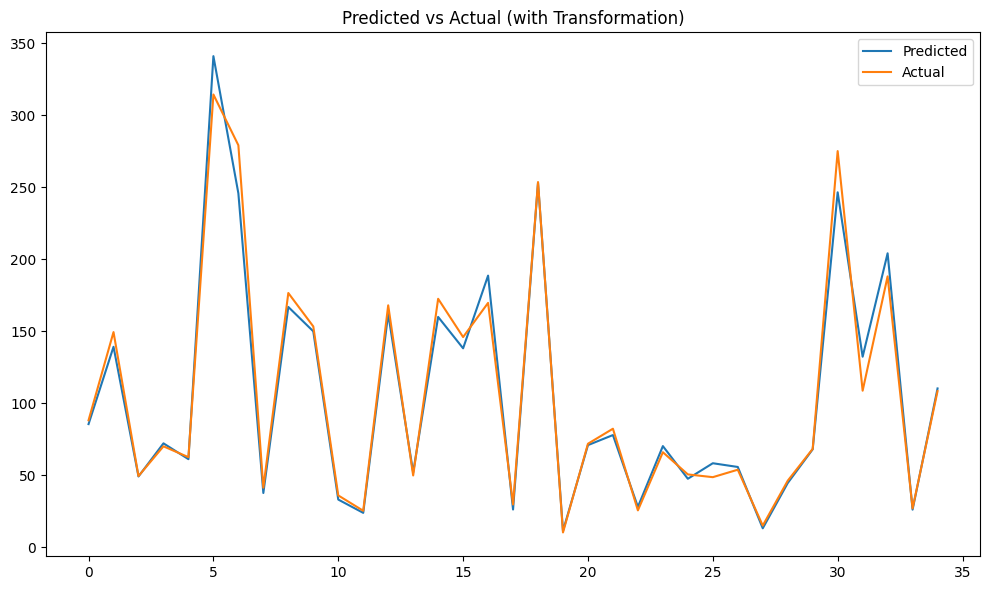

In [ ]:

plt.figure(figsize=(10, 6))

# Plot with transformation
plt.plot(10 ** (y_pred_test_gs))
plt.plot(np.array(10 ** (y_test)))
plt.legend(["Predicted", "Actual"])
plt.title("Predicted vs Actual (with Transformation)")

plt.tight_layout()
plt.show()


Text(0.5, 0.98, 'Residual Analysis')

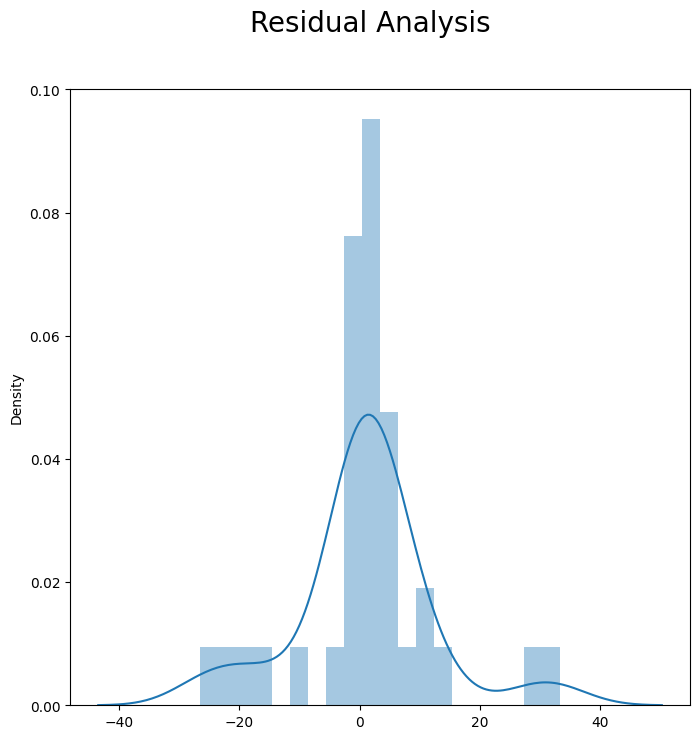

In [ ]:
fig=plt.figure(figsize=(8,8))

sns.distplot((10**(y_test)- 10**(y_pred_test_gs)),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

##ML Model - RandomForest model

Random forest is an ensemble learning algorithm that constructs a multitude of decision trees at training time and outputs the mean prediction of the individual trees as the final prediction.

The RandomForestRegressor class allows you to train a regression model using the random forest algorithm, and then use it to make predictions on new data

In [ ]:
# ML Model - 2 Implementation
rf = RandomForestRegressor()

# Fit the Algorithm
rf.fit(x_train,y_train)

# Predict on the model
y_pred_train_rf =rf.predict(x_train)
y_pred_test_rf =rf.predict(x_test)

In [ ]:
# Metric Score for train set
train_MAE_rf = mean_absolute_error(10**(y_train),(10**y_pred_train_rf))
print(f"Mean Absolute Error : {train_MAE_rf}")


train_MSE_rf  = mean_squared_error(10**(y_train), 10**(y_pred_train_rf))
print("MSE :" , train_MSE_rf)

train_RMSE_rf = np.sqrt(train_MSE_rf)
print("RMSE :" ,train_RMSE_rf)

train_r2_rf = r2_score(10**(y_train), 10**(y_pred_train_rf))
print("R2 :" ,train_r2_rf)

train_adjusted_r2_rf=1-(1-r2_score(10**(y_train), 10**(y_pred_train_rf)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_rf)

print('\n')

# Metric Score for test set
MAE_rf = mean_absolute_error(10**(y_test),(10**y_pred_test_rf))
print(f"Mean Absolute Error : {MAE_rf}")

MSE_rf  = mean_squared_error(10**(y_test), 10**(y_pred_test_rf))
print("MSE :" , MSE_rf)

RMSE_rf = np.sqrt(MSE_rf)
print("RMSE :" ,RMSE_rf)

r2_rf = r2_score(10**(y_test), 10**(y_pred_test_rf))
print("R2 :" ,r2_rf)

adjusted_r2_rf=1-(1-r2_score(10**(y_test), 10**(y_pred_test_rf)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_rf)


Mean Absolute Error : 4.098759969962597
MSE : 49.1970224206619
RMSE : 7.014058911975426
R2 : 0.9953194144405446
Adjusted R2: 0.9948287078899566


Mean Absolute Error : 10.285827991679307
MSE : 338.63699651284037
RMSE : 18.40209217759873
R2 : 0.948970890734021
Adjusted R2: 0.9173814421407959


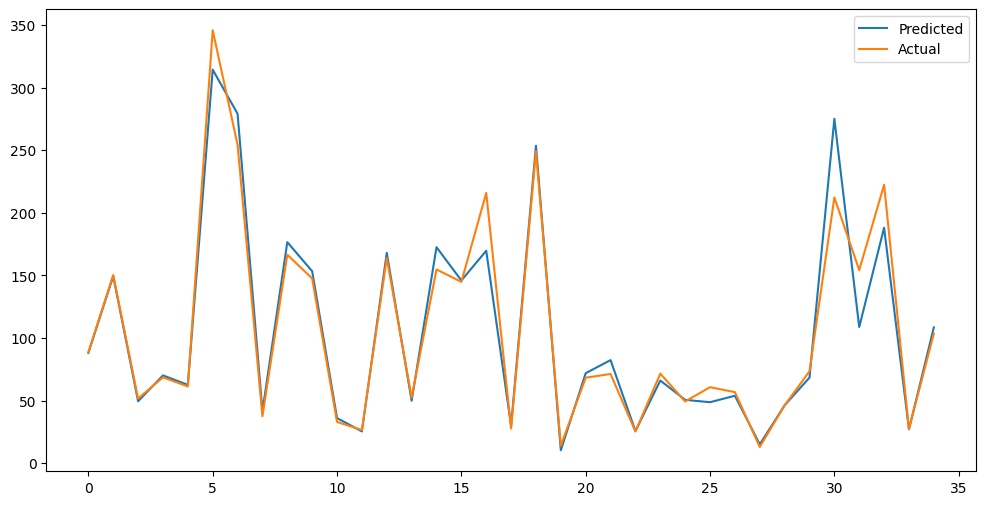

In [ ]:

plt.figure(figsize=(12,6))
plt.plot(np.array(10**y_test))
plt.plot(10**((y_pred_test_rf)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:


from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [50,80,100,200,300],
    'max_depth': [1,2,6,7,8,9,10,20,30,40],
    'min_samples_split':[10,20,30,40,50,100,150,200],
    'min_samples_leaf': [1,2,8,10,20,40,50]


}


# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(rf, param_grid_rf,verbose=2, cv=5, scoring='r2')

# Fit the RandomizedSearchCV object to the training data
random_search.fit(x_train, y_train)

# Get the best estimator
best_model_rf_rs = random_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=8, min_samples_leaf=8, min_samples_split=100, n_estimators=200; total time=   0.3s
[CV] END max_depth=8, min_samples_leaf=8, min_samples_split=100, n_estimators=200; total time=   0.3s
[CV] END max_depth=8, min_samples_leaf=8, min_samples_split=100, n_estimators=200; total time=   0.2s
[CV] END max_depth=8, min_samples_leaf=8, min_samples_split=100, n_estimators=200; total time=   0.2s
[CV] END max_depth=8, min_samples_leaf=8, min_samples_split=100, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=200, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=200, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=200, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=200, n_estimators=200; total time=   0.2s
[CV] END max_

In [ ]:

best_model_rf_rs.feature_importances_

array([9.16820170e-01, 7.18588855e-02, 7.13822939e-03, 7.29661823e-04,
       6.65905083e-04, 7.34387421e-04, 2.09769248e-04, 3.14101540e-04,
       1.31730211e-04, 7.10934024e-05, 1.71302755e-04, 2.28158227e-04,
       9.26605081e-04])

In [ ]:
print(best_model_rf_rs)

RandomForestRegressor(max_depth=20, min_samples_leaf=8, min_samples_split=10,
                      n_estimators=300)


In [ ]:
random_search.score(x_train,y_train)

0.9818791363923661

#Conclusion

The main goal of the project is to create a machine learning model which can predict the closing price of Yes Bank stock for that month, keeping in mind of the fraud case happened in 2018.

I have developed 2 models Ridge_Regression, Random forest. It also considering all newlt added features and taking care of multicollinearity.

Using data visualization on our target variable, we can clearly see the impact of 2018 fraud case involving Rana Kapoor as the stock prices decline dramatically during that period.

We found that the distribution of all our variables is positively skewed. so we performed log transformation on them.

I considered to take mean of Open, High and Low faetures.Additional features were engineered by taking lags to capture the temporal trends and patterns, which can also can take care of fraud case by studying the pattern.



Given the dataset and features, Our model is performing well on all data-points. With our model making predictions with such high accuracy, we can confidently deploy this model for further predictive tasks using future data.